<a href="https://colab.research.google.com/github/M0M0-M/csc4792-project_team_28/blob/du-initial-exploration/_project_teacsc4792m_28_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zambia Gazette Text Classification Project



## Table of Contents
1. [Business Understanding](#1-business-understanding)  
2. [Methodology](#2-methodology)  
3. [Tools and Technologies](#3-tools-and-technologies)  
4. [Expected Outcomes](#4-expected-outcomes)  
5. [Future Enhancements](#5-future-enhancements)


# 1. BUSINESS UNDERSTANDING
## 1.1 PROBLEM STATEMENT

The Zambia Government Gazette publishes official notices, legal updates, tenders, and public announcements. These documents are published in PDF format, and often unstructured, making it difficult for stakeholders such as lawyers, journalists, researchers, and the general public to quickly find relevant information. Manual searching is time-consuming and prone to oversight. There is a need for an automated method to classify Gazette notices into categories (e.g., legal notices, tenders, appointments, public warnings) for faster retrieval and analysis.

## 1.2 BUSINESS OBJECTIVES

The primary objective is to develop a system that automatically processes and classifies Gazette publications into predefined categories. Success will mean that end users can:

Quickly identify and filter notices by category.

Reduce time spent manually scanning through documents.

Gain improved access to relevant legal or public information.

From a real-world perspective, this will increase efficiency for professionals and citizens who rely on the Gazette for important updates.

## 1.3 DATA MINING GOALS

We will build a text classification model that:

Extracts text from Gazette PDFs.

Preprocesses the text (cleaning, tokenization, stopword removal).

Classifies each notice into categories.

Outputs labeled data for easy search and retrieval.

The approach will likely involve Natural Language Processing (NLP) and machine learning algorithms such as Logistic Regression or Support Vector Machines.

## 1.4 INITIAL SUCCESS CRITERIA

The project will be considered successful if:

The classification model achieves at least 80% accuracy on the test dataset.

Categories are clearly and vividly defined, distinct, and interpretable.

The pipeline can handle at least 10 new Gazette PDFs per month without major manual intervention.

Users confirm that classification results improve search speed and relevance compared to manual reading.

## 1.5 SCOPE & ASSUMPTIONS

Scope:

Focus on classifying Gazette notices into 4–6 main categories.

Work only with English-language Gazettes.

Process and analyze a subset of recent Gazette issues.

Assumptions:

PDF files are accessible and legally permissible for analysis.

Categories remain consistent over time.

OCR (Optical Character Recognition) will be needed for scanned documents.

## 1.6 RISKS & CONSTRAINTS

Risks:

Poor text quality from scanned PDFs may reduce OCR accuracy.

Some notices may belong to multiple categories, complicating classification.

Limited labelled training data could impact model performance.

Constraints:

Legal constraint: Must comply with any copyright or government data use regulations.

## 1.7 Expected Benefits
The system will enable faster retrieval of Gazette notices, enhance transparency, and support informed decision-making for both professionals and the public.

## 1.8 METHODOLOGY
### 1.8.1 DATA COLLECTION

Download Gazette PDFs from the official Zambia Government Gazette website.

Ensure documents cover a representative period to include diverse categories.

Maintain a record of file metadata (date, publication number) for reference.
### 1.8.2 DATA PREPROCESSING

Convert PDFs to text using OCR for scanned documents.

Remove irrelevant elements (headers, footers, page numbers).

Tokenize text and remove stopwords, punctuation, and special characters.

Standardize text formatting (e.g., lowercasing, stemming).

### 1.8.3 MODEL SELECTION

Evaluate multiple classification algorithms: Logistic Regression, Support Vector Machines, and Random Forest.

Use TF-IDF or word embeddings to represent text features.

Optimize model parameters using cross-validation.

### 1.8.4 EVALUATION METRICS

Accuracy, precision, recall, and F1-score for each category.

Confusion matrix to identify misclassification trends.

User feedback on relevance and usefulness of classified notices.

## 1.9 TOOLS AND TECHNOLOGIES

Programming Languages: Python

Libraries: scikit-learn, pandas, NumPy, NLTK, spaCy, PyPDF2, Tesseract OCR

Environment: Jupyter Notebook / Python IDE

Version Control: Git / GitHub

## 1.10 EXPECTED OUTCOMES

Automated classification of Gazette notices into predefined categories.

A searchable dataset with labeled notices for faster retrieval.

Insights into the distribution and frequency of notice types.

Reduced manual effort for users accessing Gazette information.

## 1.11 FUTURE ENHANCEMENTS

Implement a web interface for searching and filtering classified notices.

Incorporate advanced NLP techniques like BERT for improved classification accuracy.

Expand to multilingual Gazettes or other official publications.

Introduce trend analysis and reporting for frequently published notice types.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create project folders on Drive (adjust path if different)
import os
base = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
folders = [
    "01_Business_Understanding",
    "02_Data_Understanding/raw_pdfs",
    "02_Data_Understanding/extracted_csv",
    "03_Data_Preparation",
    "04_Modeling",
    "05_Evaluation",
    "06_Deployment",
    "Reports",
    "Slides"
]
for f in folders:
    os.makedirs(os.path.join(base, f), exist_ok=True)

print("Folders created at:", base)

Folders created at: /content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28


# 2. Data Understanding

## 2.1 Loading the Dataset
( Loading CSV into Pandas DataFrame.)

## 2.2 Initial Exploration
- `df.shape`, `df.head()` and explain results.  
- `df.info()`, `df.describe(include="all")` and explain results.  

## 2.3 Visual Exploration
- Create histograms for numerical columns.  
- Create bar plots for categorical columns.

## 2.4 Summary of Findings
- Summary on dataset structure, missing values, distributions, and early insights.


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

In [ ]:
# Extract text from Gazette PDFs into a CSV
!pip install --quiet PyMuPDF
import fitz, os, pandas as pd, glob

BASE = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
RAW_DIR = os.path.join(BASE, "02_Data_Understanding", "raw_pdfs")
OUT_DIR = os.path.join(BASE, "02_Data_Understanding", "extracted_csv")
os.makedirs(OUT_DIR, exist_ok=True)

def extract_pdf_to_rows(pdf_path):
    rows = []
    fn = os.path.basename(pdf_path)
    doc_id = os.path.splitext(fn)[0]
    with fitz.open(pdf_path) as doc:
        for pno, page in enumerate(doc, start=1):
            text = page.get_text("text")
            paras = [t.strip() for t in text.split("\n\n") if t.strip()]
            for i, para in enumerate(paras, start=1):
                wc = len(para.split())
                entry_id = f"{doc_id}_p{pno}_seg{i}"
                rows.append({
                    "entry_id": entry_id,
                    "doc_id": doc_id,
                    "filename": fn,
                    "page": pno,
                    "para_idx": i,
                    "text": para,
                    "word_count": wc,
                    "char_len": len(para),
                    "category": ""
                })
    return rows

all_rows = []
pdfs = sorted(glob.glob(os.path.join(RAW_DIR, "*.pdf")))
print(f"Found {len(pdfs)} PDF(s).")

for pdf in pdfs:
    all_rows.extend(extract_pdf_to_rows(pdf))

df = pd.DataFrame(all_rows)

out_csv = os.path.join(OUT_DIR, "gazette_segments1.csv")
df.to_csv(out_csv, index=False)
print("Saved:", out_csv, "Rows:", len(df))


Found 10 PDF(s).
Saved: /content/drive/MyDrive/csc4792-project_team_28/02_Data_Understanding/extracted_csv/gazette_segments1.csv Rows: 133


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28/02_Data_Understanding/extracted_csv/gazette_segments.csv")
df.head()

,entry_id,doc_id,filename,page,para_idx,text,word_count,char_len,category
0,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,1,1,Published by Authority \nREPUBLIC \nOF ZAMBIA ...,653,4421,NaN
1,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,2,1,[1133830 \nGi \nze \nEN \nECE \nI —> \n1 \nGAZ...,812,4881,NaN
2,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,3,1,"29th November, 2024 \nGAZETTE Notice No. 1266 ...",708,4425,NaN
3,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,4,1,Zambia Gazette \n1200 \n319/9 \nGazerre Notice...,904,5458,NaN
4,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,5,1,"29th November, 2024 \nApvt—1799-—1134148/] \nT...",767,4788,NaN


In this dataset, each of these rows represents a paragraph from a given government gazette. This allows easy querying and analysis of the document's contents.

`df.head()` shows the first 5 entries from the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   entry_id    133 non-null    object 
 1   doc_id      133 non-null    object 
 2   filename    133 non-null    object 
 3   page        133 non-null    int64  
 4   para_idx    133 non-null    int64  
 5   text        133 non-null    object 
 6   word_count  133 non-null    int64  
 7   char_len    133 non-null    int64  
 8   category    0 non-null      float64
dtypes: float64(1), int64(4), object(4)
memory usage: 9.5+ KB


`df.info()` shows information on the dataframe, such as how many entries are within it, the data types of the columns, and it's current memory usage.

In [ ]:
df.describe(include="all")

,entry_id,doc_id,filename,page,para_idx,text,word_count,char_len,category
count,133,133,133,133.000000,133.0,133,133.000000,133.000000,0.0
unique,133,10,10,NaN,NaN,133,NaN,NaN,NaN
top,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2025-06-20-no-7773,zm-government-gazette-dated-2025-06-20-no-7773...,NaN,NaN,Published by Authority \nREPUBLIC \nOF ZAMBIA ...,NaN,NaN,NaN
freq,1,41,41,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.330827,1.0,NaN,580.533835,3670.902256,NaN
std,NaN,NaN,NaN,10.296897,0.0,NaN,314.368476,1803.953045,NaN
min,NaN,NaN,NaN,1.000000,1.0,NaN,63.000000,460.000000,NaN
25%,NaN,NaN,NaN,4.000000,1.0,NaN,309.000000,2213.000000,NaN
50%,NaN,NaN,NaN,7.000000,1.0,NaN,538.000000,3484.000000,NaN
75%,NaN,NaN,NaN,16.000000,1.0,NaN,822.000000,5052.000000,NaN


`df.describe()` displays metrics for columns containing numbers such as the count, the mean and the standard deviation of values, whether they are close to the mean or not.

For non-numeric types, it shows the count of the non-null values, how many unique values are int he dataframe, and the the most frequent value as well as its frequency.

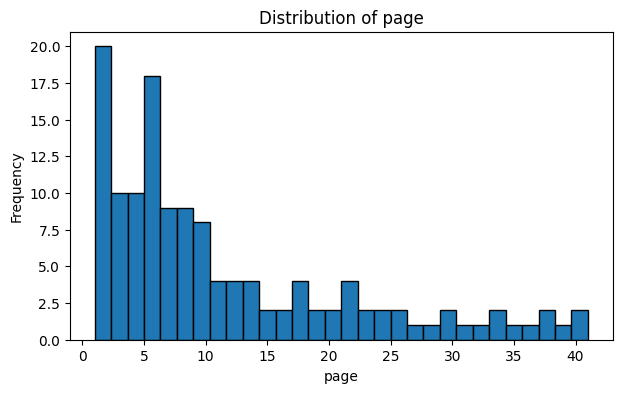

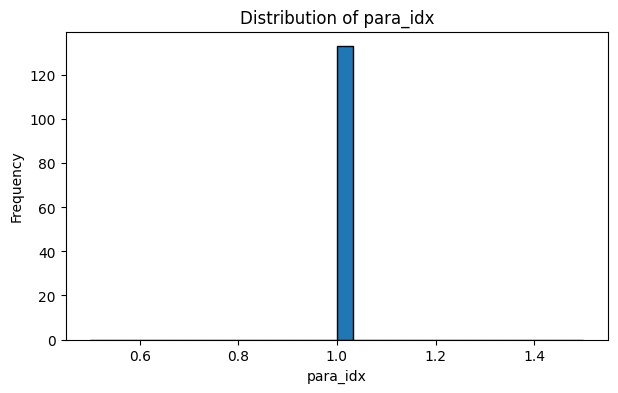

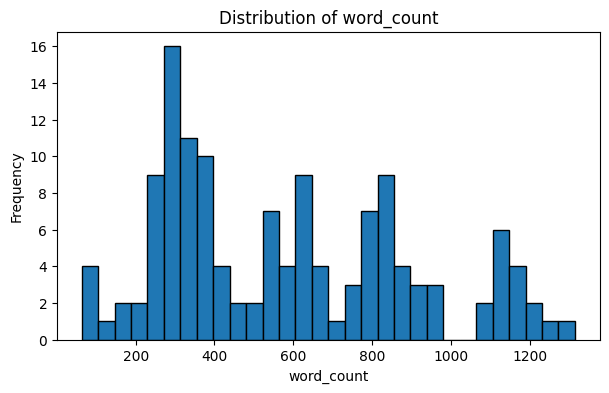

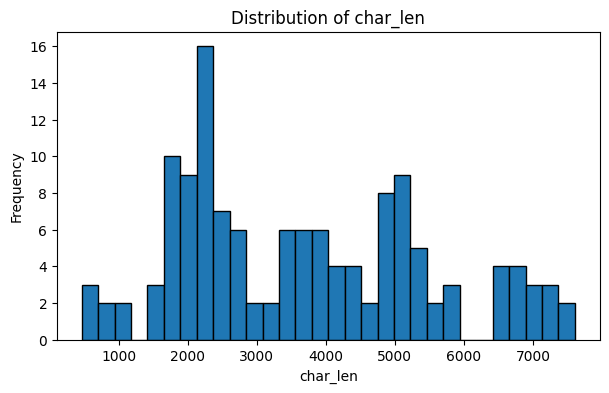

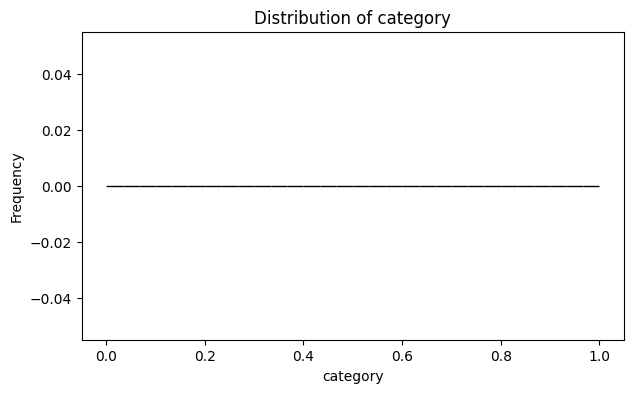

In [ ]:
 # 2.3 Visual Exploration - Histograms for Numerical Columns

import matplotlib.pyplot as plt


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numerical_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
